<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part2_Xgboost_gammapred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [168]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [169]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [170]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [171]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [172]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [173]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [174]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [175]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [176]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [177]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])  
  
Beta = pd.DataFrame(beta_list)     

In [178]:
gamma_list = []
for i in range(1000):
  for j in range(10):
    gamma_list.append(gamma[i])  
  
Gamma = pd.DataFrame(gamma_list)     

In [179]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [180]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta,Gamma], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5,6,7
0,227.660942,6.859904e-05,772.338990,227.660922,4.388599e-05,772.339034,1.516457,0.791954
1,227.660889,-3.207587e-10,772.339111,227.660889,-2.716664e-10,772.339111,1.516457,0.791954
2,228.289927,8.119469e-01,770.898126,228.063256,5.198229e-01,771.416922,1.516457,0.791954
3,228.644356,1.267686e+00,770.087958,228.289927,8.119469e-01,770.898126,1.516457,0.791954
4,227.688463,3.567550e-02,772.275862,227.678528,2.282330e-02,772.298648,1.516457,0.791954


In [181]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [182]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7
0,0.178934,2.300898e-07,0.821256,0.178936,1.467471e-07,0.821254,0.515268,0.792370
1,0.178934,7.574237e-13,0.821257,0.178936,9.572188e-13,0.821255,0.515268,0.792370
2,0.179603,2.723350e-03,0.819724,0.179364,1.738175e-03,0.820274,0.515268,0.792370
3,0.179981,4.251943e-03,0.818863,0.179606,2.714974e-03,0.819722,0.515268,0.792370
4,0.178963,1.196591e-04,0.821189,0.178955,7.631616e-05,0.821212,0.515268,0.792370
...,...,...,...,...,...,...,...,...
9995,0.993411,3.980268e-03,0.006384,0.993220,3.985360e-03,0.006571,0.054175,0.155463
9996,0.982011,4.765216e-03,0.017523,0.981782,4.763010e-03,0.017749,0.054175,0.155463
9997,0.985327,4.576269e-03,0.014270,0.985107,4.576467e-03,0.014487,0.054175,0.155463
9998,0.987615,4.426983e-03,0.012032,0.987402,4.428722e-03,0.012242,0.054175,0.155463


In [206]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[7]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [207]:
X_dev, X_test1, y_dev, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [209]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest = xgb.DMatrix(X_test1, label=y_test1)

In [210]:
from sklearn.metrics import mean_absolute_error

In [211]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [212]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [213]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [214]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[12:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0850254 for 793 rounds
CV with max_depth=9, min_child_weight=6
[12:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[

In [215]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [216]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [217]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0838576 for 772 rounds
CV with subsample=1.0, colsample=0.9
[12:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:

In [218]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1

In [219]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CV with eta=0.3
[12:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 16s, sys: 326 ms, total: 1min 17s
Wall time: 39.1 s
	MAE 0.0826954 for 946 rounds

CV with eta=0.2
[12:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:52] WARNING: /workspace/src/obj

In [220]:
params['eta'] = .2

In [221]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[12:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.218877
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:0.197879
[2]	DEV-mae:0.182442
[3]	DEV-mae:0.170295
[4]	DEV-mae:0.160919
[5]	DEV-mae:0.153278
[6]	DEV-mae:0.147543
[7]	DEV-mae:0.142925
[8]	DEV-mae:0.13891
[9]	DEV-mae:0.135938
[10]	DEV-mae:0.132718
[11]	DEV-mae:0.1308
[12]	DEV-mae:0.128735
[13]	DEV-mae:0.127025
[14]	DEV-mae:0.125722
[15]	DEV-mae:0.124425
[16]	DEV-mae:0.123456
[17]	DEV-mae:0.12231
[18]	DEV-mae:0.120932
[19]	DEV-mae:0.120491
[20]	DEV-mae:0.119001
[21]	DEV-mae:0.118391
[22]	DEV-mae:0.116992
[23]	DEV-mae:0.116471
[24]	DEV-mae:0.115445
[25]	DEV-mae:0.115172
[26]	DEV-mae:0.114462
[27]	DEV-mae:0.113975
[28]	DEV-mae:0.113298
[29]	DEV-mae:0.112721
[30]	DEV-mae:0.112348
[31]	DEV-mae:0.111778
[32]	DEV-mae:0.110965
[33]	DEV-mae:0.110869
[34]	DEV-mae:0.110486
[35]	DEV-mae:0.110217
[36]	DEV-mae:0.109893
[37]	DEV-mae:0.109

In [222]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[12:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.222599
[1]	Test-mae:0.201223
[2]	Test-mae:0.185337
[3]	Test-mae:0.172482
[4]	Test-mae:0.162967
[5]	Test-mae:0.154905
[6]	Test-mae:0.149044
[7]	Test-mae:0.14332
[8]	Test-mae:0.138898
[9]	Test-mae:0.135533
[10]	Test-mae:0.132556
[11]	Test-mae:0.130643
[12]	Test-mae:0.128515
[13]	Test-mae:0.126549
[14]	Test-mae:0.125129
[15]	Test-mae:0.123907
[16]	Test-mae:0.123069
[17]	Test-mae:0.121731
[18]	Test-mae:0.120111
[19]	Test-mae:0.119712
[20]	Test-mae:0.118371
[21]	Test-mae:0.117786
[22]	Test-mae:0.116459
[23]	Test-mae:0.115844
[24]	Test-mae:0.114804
[25]	Test-mae:0.114396
[26]	Test-mae:0.113565
[27]	Test-mae:0.113041
[28]	Test-mae:0.112273
[29]	Test-mae:0.111625
[30]	Test-mae:0.111041
[31]	Test-mae:0.11039
[32]	Test-mae:0.109508
[33]	Test-mae:0.10939
[34]	Test-mae:0.108893
[35]	Test-mae:0.108587
[36]	Test-mae:0.108434
[37]	Test-mae:0.107751
[38]	Test-ma

In [223]:
mean_absolute_error(best_model.predict(dtest), y_test1)

0.07174938314270088

In [224]:
best_model.save_model("my_model.model")

In [225]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
p = loaded_model.predict(dtest)
q = loaded_model.predict(dtrain)

[12:54:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


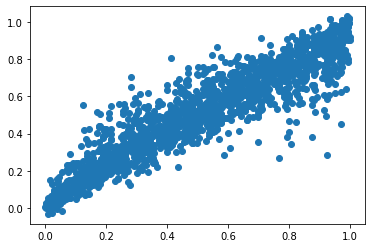

In [226]:
plt.scatter(y_test1,p)

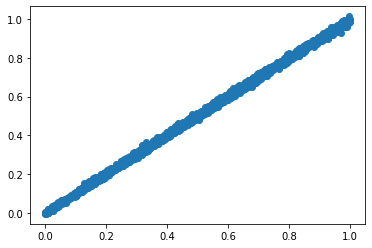

In [227]:
plt.scatter(y_train,q)

In [228]:
rmse_train = np.sqrt(mean_squared_error(y_train,q))
r2_train = r2_score(y_train, q)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test1, p))
r2_test = r2_score(y_test1, p)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.006178829175710078
R2 score of training set is 0.9995477583245158


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.10242561722089322
R2 score of test set is 0.8738632348139815
